In [1]:
from scipy.io.arff import loadarff
import pandas as pd
from sklearn.model_selection import train_test_split 
import numpy as np
from sklearn import tree, metrics
from sklearn.feature_selection import SelectKBest, mutual_info_classif

In [2]:
data = loadarff('pd_speech.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')
print(df.head())
print(df.shape)

       PPE      DFA     RPDE  numPulses  numPeriodsPulses  meanPeriodPulses  \
0  0.85247  0.71826  0.57227      240.0             239.0          0.008064   
1  0.76686  0.69481  0.53966      234.0             233.0          0.008258   
2  0.85083  0.67604  0.58982      232.0             231.0          0.008340   
3  0.41121  0.79672  0.59257      178.0             177.0          0.010858   
4  0.32790  0.79782  0.53028      236.0             235.0          0.008162   

   stdDevPeriodPulses  locPctJitter  locAbsJitter  rapJitter  ...  \
0            0.000087       0.00218      0.000018    0.00067  ...   
1            0.000073       0.00195      0.000016    0.00052  ...   
2            0.000060       0.00176      0.000015    0.00057  ...   
3            0.000183       0.00419      0.000046    0.00149  ...   
4            0.002669       0.00535      0.000044    0.00166  ...   

   tqwt_kurtosisValue_dec_28  tqwt_kurtosisValue_dec_29  \
0                     1.5620                     2.

In [3]:
print(df.value_counts('class'))
print(df.isna().sum())


class
1    564
0    192
dtype: int64
PPE                          0
DFA                          0
RPDE                         0
numPulses                    0
numPeriodsPulses             0
                            ..
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
class                        0
Length: 753, dtype: int64


In [4]:
number_of_features = [1, 5, 10, 40, 100, 250, 700]
x, y = df.drop('class', axis=1), np.ravel(df['class'])
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state=1)
data_accuracy_results = {'training':[], 'testing':[]}
for i in number_of_features:
    select = SelectKBest(score_func = mutual_info_classif, k=i)
    select.fit(x_train, y_train)
    x_train_new = select.transform(x_train)
    x_test_new = select.transform(x_test)
    predictor = tree.DecisionTreeClassifier()
    predictor.fit(x_train_new, y_train)
    y_pred_train = predictor.predict(x_train_new)
    y_pred_test = predictor.predict(x_test_new)
    data_accuracy_results['training'].append(metrics.accuracy_score(y_train, y_pred_train))
    data_accuracy_results['testing'].append(metrics.accuracy_score(y_test, y_pred_test))

    


<AxesSubplot:>

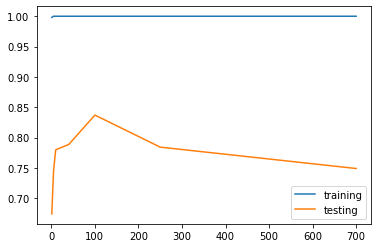

In [5]:
df_accuracy_results = pd.DataFrame(data_accuracy_results, index = number_of_features)
df_accuracy_results.plot.line()

In [6]:
print(data_accuracy_results['training'][0])

0.998109640831758
